# [1] 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# 데이터 획득

path = '/content/drive/MyDrive/Final_Project_4조/data_regression'
train = pd.read_csv(os.path.join(path, 'train.csv'), index_col='id')
test = pd.read_csv(os.path.join(path, 'test.csv'), index_col='id')
submission = pd.read_csv(os.path.join(path, 'sample_submission.csv'))

# 데이터 shape 확인
train.shape, test.shape, submission.shape

((5407, 9), (3605, 8), (3605, 2))

In [4]:
train.head(5)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [5]:
test.head(5)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
id,,,,,,,,
5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28


In [6]:
submission.head(5)

,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452


In [7]:
# 컬럼 확인
train.columns, test.columns, submission.columns
# 종속변수(target) : 'Strength'
# 제출 : 'id', 'Strength' 개입

(Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
        'WaterComponent', 'SuperplasticizerComponent',
        'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
        'Strength'],
       dtype='object'),
 Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
        'WaterComponent', 'SuperplasticizerComponent',
        'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
       dtype='object'),
 Index(['id', 'Strength'], dtype='object'))

## 피처 요약표 기준 피처 엔지니어링 전략 수립


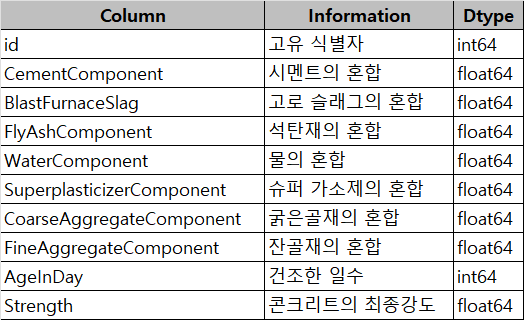

In [8]:
# 피처 요약표 정리
# train 데이터 중심으로 체크

'''
- Feature(독립변수)
  - 'CementComponent' : 시멘트의 양이 혼합 - float64
  - 'BlastFurnaceSlag' : 고로 슬래그의 양이 혼합 - float64
    : 고로슬래그 - 용광로에서 철광석으로부터 선철을 만들 때 생기는 슬래그(철 이외의 불순물이 모인 것)
  - 'FlyAshComponent' : 플라이애쉬의 양이 혼합 - float64
    : 플라이애시 - 보일러의 연도 가스로부터 집진기로 채취한 석탄재(콘크리트의 혼화재로 사용)
  - 'WaterComponent' : 물의 양이 혼합 - float64
  - 'SuperplasticizerComponent' : 슈퍼 가소제를 일정량 혼합 - float64
    : 고성능 감수제(유동화제) - 미리 비빔한 콘크리트에 첨가하여 이것을 교반시킴으로써 부드러움을 증대
  - 'CoarseAggregateComponent' : Coarse Aggregate의 양이 혼합 - float64
    : 굵은 골재
  - 'FineAggregateComponent' : 굵은 골재량이 혼합 - float64
    : 잔골재
  - 'AgeInDays' : 건조하게 방치된 일수 - int64

- Target(종속변수)
  - 'Strength' : 콘크리트의 최종강도는 무엇 - float64
'''
train.head(2).T

id,0,1
CementComponent,525.00,143.00
BlastFurnaceSlag,0.00,169.00
FlyAshComponent,0.00,143.00
WaterComponent,186.00,191.00
SuperplasticizerComponent,0.00,8.00
CoarseAggregateComponent,1125.00,967.00
FineAggregateComponent,613.00,643.00
AgeInDays,3.00,28.00
Strength,10.38,23.52


In [9]:
# 결측여부, 피처명, 타입 확인
# 결측치 -> 0 다수 존재! 어떻게 처리??
train.info(), test.info(), submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 3605 entries, 5407 to 9011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComp

(None, None, None)

In [10]:
# 샘플값 추출

def summry_feature_info( df ):
    '''
        주어진 df로 부터 피처별 요약된 정보 생성 제공
    '''
    # 타입을 데이터로 기본 구성
    summary_df = pd.DataFrame( df.dtypes, columns=['타입'])

    # feature :컬럼명을 데이터로 한
    summary_df.reset_index(inplace=True) # 인덱스 -> 컬럼으로 이동
    summary_df.rename( columns={'index':'feature'}, inplace=True) # 컬럼명 변경
    # 고유값수
    summary_df['고유값수'] = df.nunique().values
    # 샘플함수를 이용 추출후 하나씩 적용해도 관계 없음
    # 샘플값_0
    summary_df['샘플값_0'] = df.iloc[0].values
    # 샘플값_1
    summary_df['샘플값_1'] = df.iloc[1].values
    # 샘플값_2
    summary_df['샘플값_2'] = df.iloc[2].values
    return summary_df

summry_feature_info( train )

,feature,타입,고유값수,샘플값_0,샘플값_1,샘플값_2
0,CementComponent,float64,314,525.00,143.00,289.00
1,BlastFurnaceSlag,float64,224,0.00,169.00,134.70
2,FlyAshComponent,float64,177,0.00,143.00,0.00
3,WaterComponent,float64,215,186.00,191.00,185.70
4,SuperplasticizerComponent,float64,112,0.00,8.00,0.00
5,CoarseAggregateComponent,float64,342,1125.00,967.00,1075.00
6,FineAggregateComponent,float64,376,613.00,643.00,795.30
7,AgeInDays,int64,15,3.00,28.00,28.00
8,Strength,float64,843,10.38,23.52,36.96


- 데이터의 특성 파악
  - 결측여부, 피처명, 타입, 고유값수, 샘플값

    - 1. 결측치
      - 0 존재 -> 그래프로 분포 체크 확인해보기
    - 2. 피처 특징
      - AgelnDay : int -> '날짜'
      - 나머지 feature : float -> 혼합 '양'
    - 3. 타입
      - 모두 float or int
    - 4. 고유값수
      - 고유값수가 많음.
    - 5. 샘플값

# [2] EDA

- 피처데이터(독립)
  - 고유값들의 비중 검색
- 타겟데이터(종속)
  - strength

## 1) 타겟데이터 분포 체크

- 회귀 : 데이터 분포 체크


In [11]:
# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

'\n'

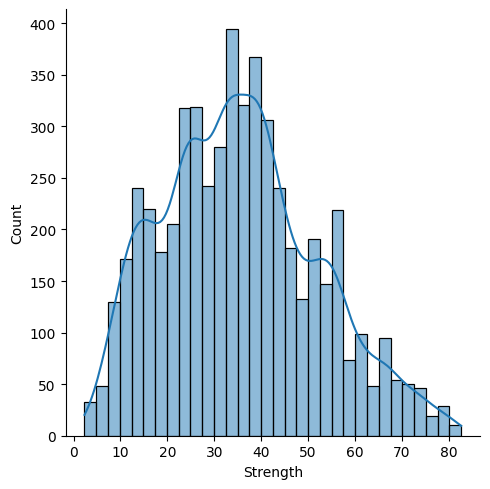

In [12]:
# 종속변수 히스토그램 + 추세선
sns.displot( train['Strength'], kde=True );

'''
'''

## 2) 피처데이터 분포 체크

### 2-1) train

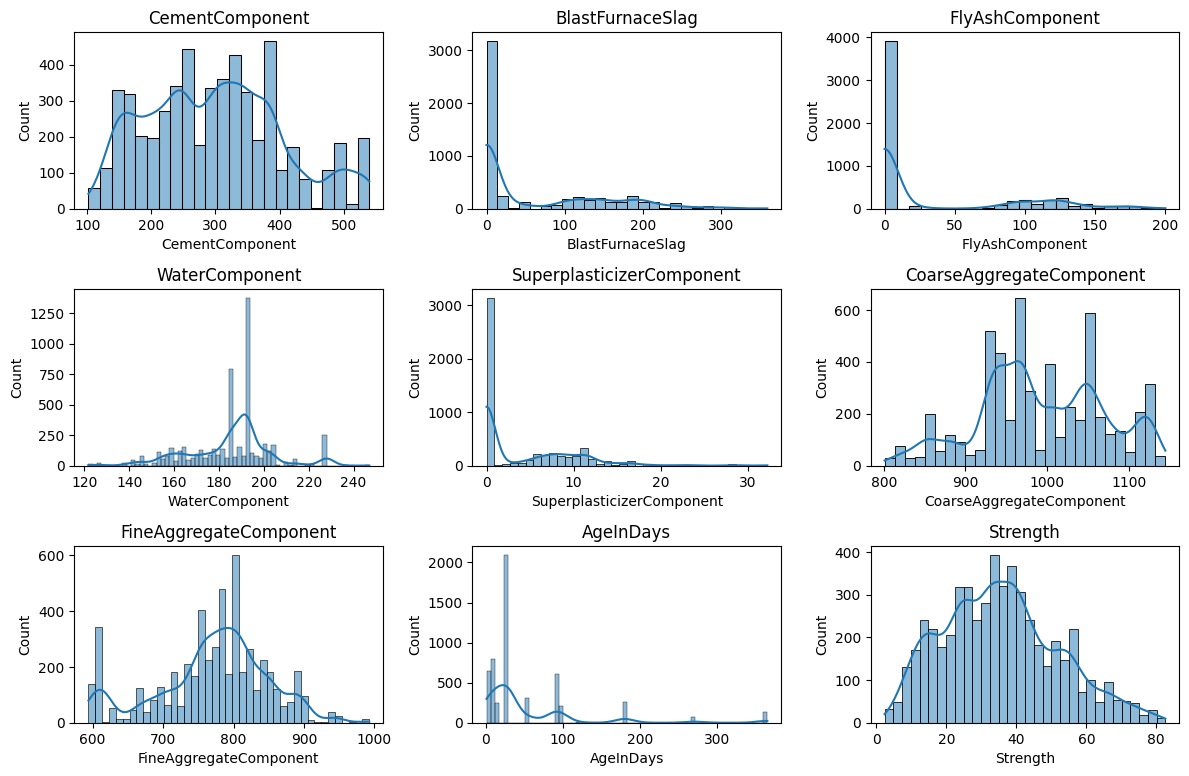

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# test 데이터프레임의 열 이름들을 가져옵니다.
columns = train.columns

# subplot의 크기를 조정합니다.
plt.figure(figsize=(12, 10))

# 각 열에 대한 그래프를 그리기 위한 반복문
for i, column in enumerate(columns):
    # subplot의 위치를 설정합니다.
    plt.subplot(len(columns)//3 + 1, 3, i+1)
    # sns.histplot을 사용하여 히스토그램을 그립니다.
    sns.histplot(train[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

### 2-2) test

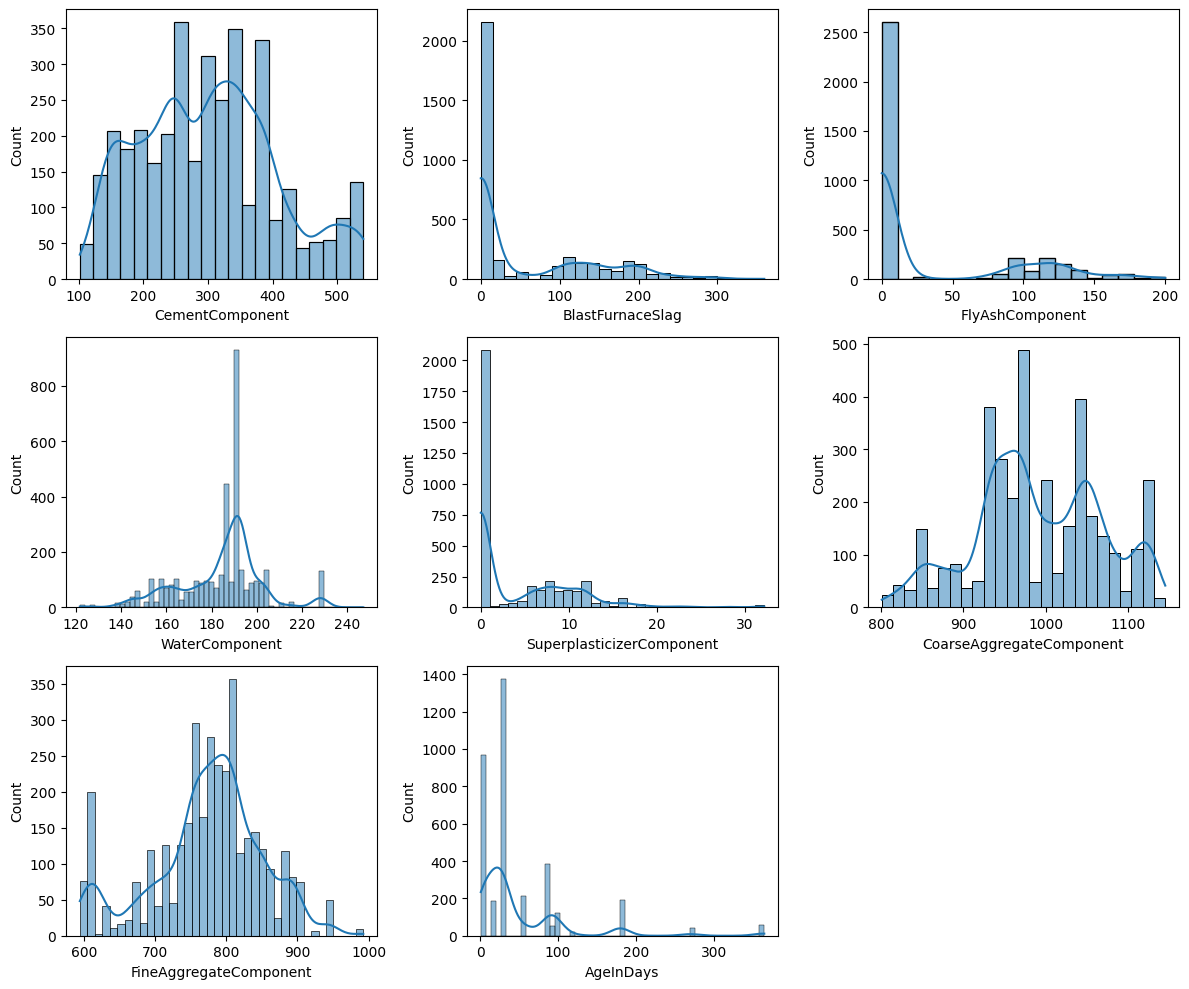

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# test 데이터프레임의 열 이름들을 가져옵니다.
columns = test.columns

# subplot의 크기를 조정합니다.
plt.figure(figsize=(12, 10))

# 각 열에 대한 그래프를 그리기 위한 반복문
for i, column in enumerate(columns):
    # subplot의 위치를 설정합니다.
    plt.subplot(len(columns)//3 + 1, 3, i+1)
    # sns.histplot을 사용하여 히스토그램을 그립니다.
    sns.histplot(test[column], kde=True)

plt.tight_layout()
plt.show()

### 2-3) train + test

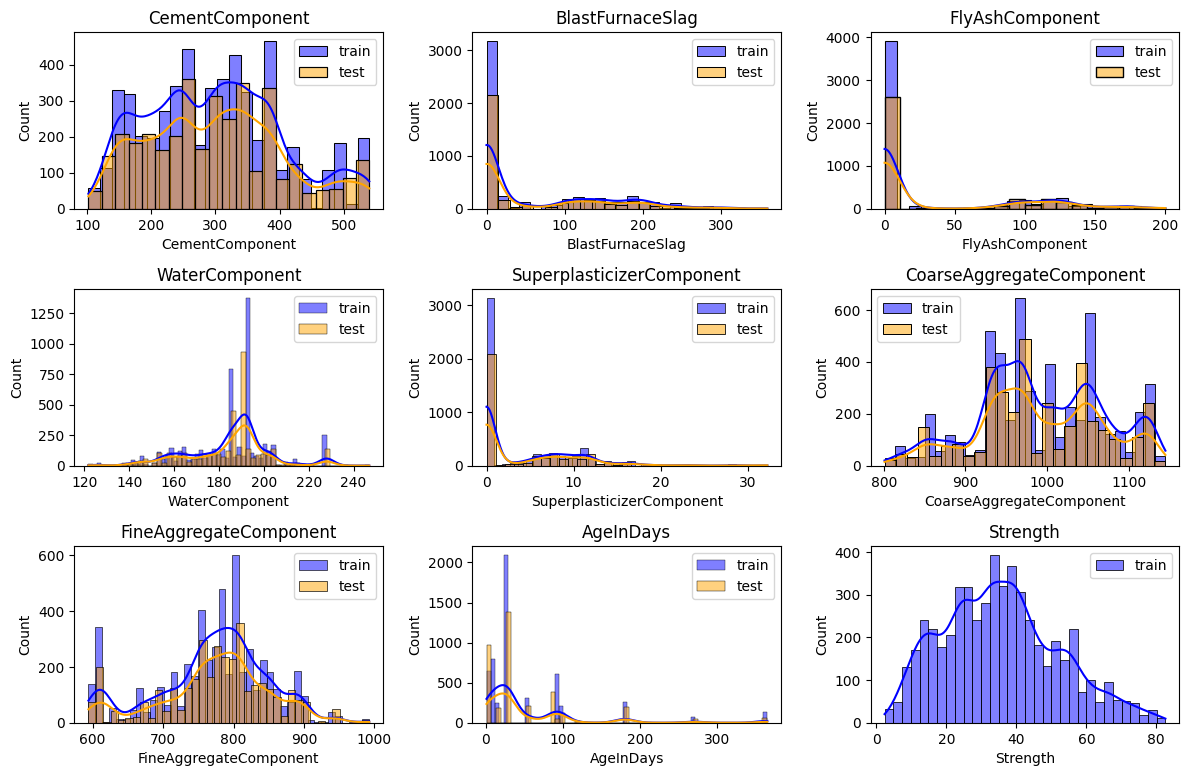

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# train 데이터프레임과 test 데이터프레임을 합칩니다.
combined_data = pd.concat([train, test], keys=['train', 'test'])

# 합친 데이터프레임의 열 이름들을 가져옵니다.
columns = combined_data.columns

# subplot의 크기를 조정합니다.
plt.figure(figsize=(12, 10))

# 각 열에 대한 그래프를 그리기 위한 반복문
for i, column in enumerate(columns):
    # subplot의 위치를 설정합니다.
    plt.subplot(len(columns)//3 + 1, 3, i+1)

    # train 데이터의 히스토그램을 그립니다.
    sns.histplot(combined_data.loc['train', column], kde=True, color='blue', label='train', alpha=0.5)

    # test 데이터에 해당 열이 있는 경우에만 그래프를 그립니다.
    if column in test.columns:
        sns.histplot(combined_data.loc['test', column], kde=True, color='orange', label='test', alpha=0.5)

    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()


### 2-4)train 산포도+회귀선

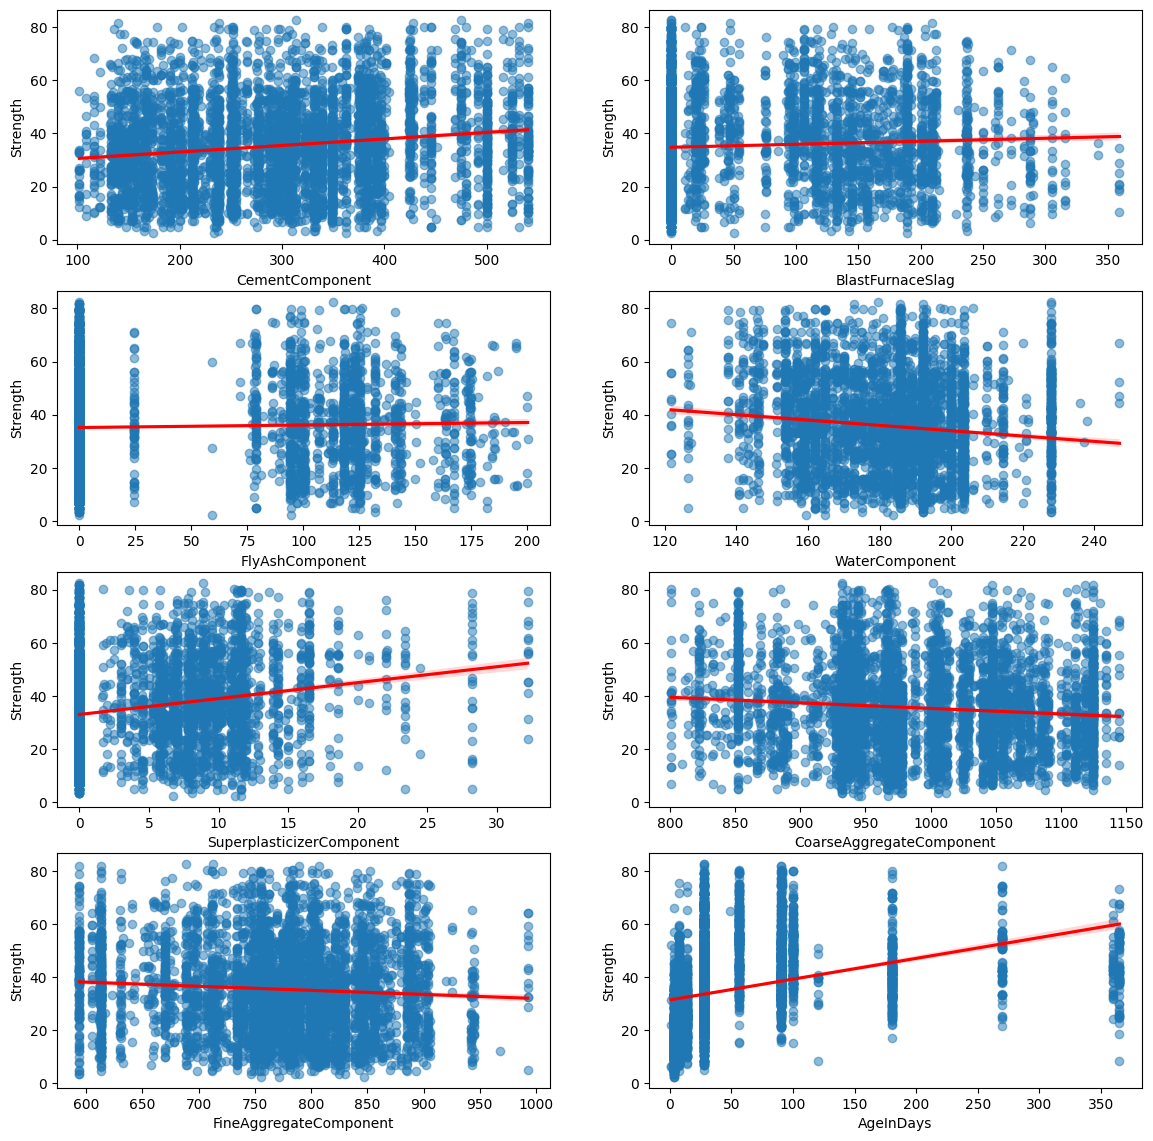

In [16]:
fig, axes = plt.subplots( nrows=4, ncols=2)
fig.set_size_inches( 2*7, 2*7)

sns.regplot(x='CementComponent', y='Strength', data=train, ax=axes[0, 0],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='BlastFurnaceSlag', y='Strength', data=train, ax=axes[0, 1],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='FlyAshComponent', y='Strength', data=train, ax=axes[1, 0],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='WaterComponent', y='Strength', data=train, ax=axes[1, 1],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='SuperplasticizerComponent', y='Strength', data=train, ax=axes[2, 0],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='CoarseAggregateComponent', y='Strength', data=train, ax=axes[2, 1],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='FineAggregateComponent', y='Strength', data=train, ax=axes[3, 0],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

sns.regplot(x='AgeInDays', y='Strength', data=train, ax=axes[3, 1],
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

plt.show()

### 2-5) 피처데이터 분포 결과

- BlastFurnaceSlag / FlyAshComponent / SuperplasticizerComponent
  - train, test 데이터 모두 0 값 다수 존재
- AgelnDays
  - 상관관계가 높음을 알 수 있지만, 분포가 고르지 않음을 파악(고유값수도 15개에 그침)

# [3] 모델구축

### 1)데이터로드

In [17]:
# 데이터 획득

path = '/content/drive/MyDrive/Final_Project_4조/data_regression'
train = pd.read_csv(os.path.join(path, 'train.csv'), index_col='id')
test = pd.read_csv(os.path.join(path, 'test.csv'), index_col='id')
submission = pd.read_csv(os.path.join(path, 'sample_submission.csv'))

# 데이터 shape 확인
train.shape, test.shape, submission.shape

((5407, 9), (3605, 8), (3605, 2))

## 2) 피처엔지니어링

### 2-1) 피처생성, 삭제

In [18]:
train[(train.BlastFurnaceSlag == 0) & (train.FlyAshComponent == 0) & (train.SuperplasticizerComponent == 0)].shape

(2140, 9)

In [19]:
test[(test.BlastFurnaceSlag == 0) & (test.FlyAshComponent == 0) & (test.SuperplasticizerComponent == 0)].shape

(1429, 8)

In [20]:
# 피처생성

for df in [train, test]:
    df['EncBlastFurnaceSlag'] = df.BlastFurnaceSlag != 0
    df['EncFlyAshComponent'] = df.FlyAshComponent != 0
    df['EncSuperplasticizerComponent'] = df.SuperplasticizerComponent != 0

In [21]:
train.columns, test.columns, submission.columns

(Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
        'WaterComponent', 'SuperplasticizerComponent',
        'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
        'Strength', 'EncBlastFurnaceSlag', 'EncFlyAshComponent',
        'EncSuperplasticizerComponent'],
       dtype='object'),
 Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
        'WaterComponent', 'SuperplasticizerComponent',
        'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
        'EncBlastFurnaceSlag', 'EncFlyAshComponent',
        'EncSuperplasticizerComponent'],
       dtype='object'),
 Index(['id', 'Strength'], dtype='object'))

In [22]:
train.shape

(5407, 12)

### 2-2) 0 값 처리

- 범주형 열만 Encoding 진행

In [23]:
# train

# 데이터 분리
train_df_1 = pd.DataFrame(train[['EncBlastFurnaceSlag', 'EncFlyAshComponent', 'EncSuperplasticizerComponent']])
train_df_2 = pd.DataFrame(train[['CementComponent', 'WaterComponent','CoarseAggregateComponent',
                                'FineAggregateComponent', 'AgeInDays','Strength']])

# 범주형 데이터만 encoding 진행
train_enc = train_df_1.astype(int)

In [24]:
# 원본 + enc 통합
train_all = pd.concat([train_df_2, train_enc], axis=1)
train_all

,CementComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent
id,,,,,,,,,
0,525.0,186.0,1125.0,613.0,3,10.38,0,0,0
1,143.0,191.0,967.0,643.0,28,23.52,1,1,1
2,289.0,185.7,1075.0,795.3,28,36.96,1,0,0
3,304.0,228.0,932.0,670.0,365,39.05,1,0,0
4,157.0,192.0,935.4,781.2,90,74.19,1,0,0
...,...,...,...,...,...,...,...,...,...
5402,446.0,162.0,967.0,712.0,3,15.42,1,1,1
5403,350.0,203.0,974.0,775.0,180,49.20,0,0,0
5404,295.8,185.7,1076.2,759.3,28,39.30,0,0,0


In [25]:
# test

# 데이터 분리
test_df_1 = pd.DataFrame(test[['EncBlastFurnaceSlag', 'EncFlyAshComponent', 'EncSuperplasticizerComponent']])
test_df_2 = pd.DataFrame(test[['CementComponent', 'WaterComponent','CoarseAggregateComponent',
                                'FineAggregateComponent', 'AgeInDays']])

# 범주형 데이터만 encoding 진행
test_enc = test_df_1.astype(int)

In [26]:
# 원본 + enc 통합
test_all = pd.concat([test_df_2, test_enc], axis=1)
test_all

,CementComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent
id,,,,,,,,
5407,166.1,173.8,1007.2,746.6,56,1,1,1
5408,304.0,190.0,998.0,801.0,7,0,0,0
5409,225.0,185.0,1113.0,833.0,28,0,0,0
5410,251.4,188.5,1028.4,757.7,100,0,1,1
5411,144.0,176.0,1021.0,709.0,28,1,1,1
...,...,...,...,...,...,...,...,...
9007,140.0,200.0,864.0,753.0,28,1,1,1
9008,281.0,186.0,1104.0,774.0,28,0,0,0
9009,289.0,194.0,924.0,760.0,28,1,0,1


### 2-3) AgeInDays

- Target Encoding은 범주형 변수를 대상 변수(타겟 변수)의 평균값으로 인코딩하는 방법입니다. 'AgeInDays' 열의 각 고유값에 대해 해당 값의 평균 타겟값을 계산하여 대체함으로써 범주형 변수를 연속형으로 인코딩

- kaggle 참고
- AgeInDays몇 가지 다른 값만 가지며 대상과의 관계는 매우 비선형적이고 단조롭지 않습니다. 이를 범주형 값으로 처리하고 대상 인코딩하여 특성 값을 해당 평균 대상 값으로 대체했습니다. 이 대상 인코딩은 일부 나무 모델에도 도움이 되었습니다.
  - https://www.kaggle.com/competitions/playground-series-s3e9/discussion/394592

In [27]:
!pip install category_encoders

In [28]:
import pandas as pd
import category_encoders as ce
from category_encoders import TargetEncoder

# Target Encoding 적용
encoder = ce.TargetEncoder(cols=['AgeInDays'])

# 피처생성
# train
train_all['AgeInDays_encoded'] = encoder.fit_transform(train_all['AgeInDays'], train_all['Strength'])

# test
test_all['AgeInDays_encoded'] = encoder.transform(test_all['AgeInDays'])

In [29]:
train_all.head(5)

,CementComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent,AgeInDays_encoded
id,,,,,,,,,,
0,525.0,186.0,1125.0,613.0,3,10.38,0,0,0,17.770579
1,143.0,191.0,967.0,643.0,28,23.52,1,1,1,37.887678
2,289.0,185.7,1075.0,795.3,28,36.96,1,0,0,37.887678
3,304.0,228.0,932.0,670.0,365,39.05,1,0,0,44.360781
4,157.0,192.0,935.4,781.2,90,74.19,1,0,0,42.836926


In [30]:
test_all.head(5)

,CementComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent,AgeInDays_encoded
id,,,,,,,,,
5407,166.1,173.8,1007.2,746.6,56,1,1,1,52.235815
5408,304.0,190.0,998.0,801.0,7,0,0,0,23.511847
5409,225.0,185.0,1113.0,833.0,28,0,0,0,37.887678
5410,251.4,188.5,1028.4,757.7,100,0,1,1,48.697641
5411,144.0,176.0,1021.0,709.0,28,1,1,1,37.887678


In [31]:
# 기존피처삭제
train_all = train_all.drop(['AgeInDays'], axis=1)
test_all = test_all.drop(['AgeInDays'], axis=1)

### 2-4)피처생성데이터 분포 점검

#### 2-4-1) 0 값 처리

<Axes: xlabel='EncSuperplasticizerComponent', ylabel='Strength'>

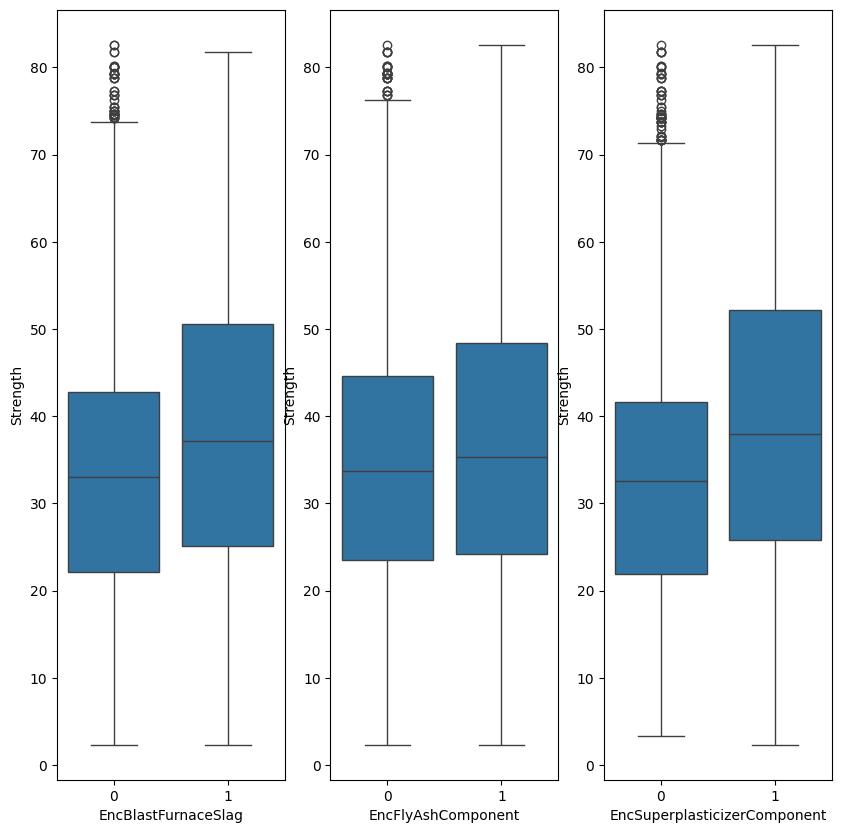

In [32]:
# 박스 플롯 기준 점검 - 이상치 체크, 데이터가 대부분 모여있는 중심점, 박스크기 검토
fig, axes = plt.subplots( nrows=1, ncols=3)
fig.set_size_inches( 2*5, 2*5) # 양을 6으로 세팅

'''
EncBlastFurnaceSlag :
EncFlyAshComponent :
EncSuperplasticizerComponent :
'''
sns.boxplot(x='EncBlastFurnaceSlag', y='Strength', data=train_all, ax=axes[0])
sns.boxplot(x='EncFlyAshComponent', y='Strength', data=train_all, ax=axes[1])
sns.boxplot(x='EncSuperplasticizerComponent', y='Strength', data=train_all, ax=axes[2])

#### 2-4-2) AgeInDays_encoded

<ipython-input-33-a999d179530d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_all, x='AgeInDays_encoded', shade=True)  # shade 옵션을 True로 설정하여 그래프 아래 영역을 음영 처리합니다.


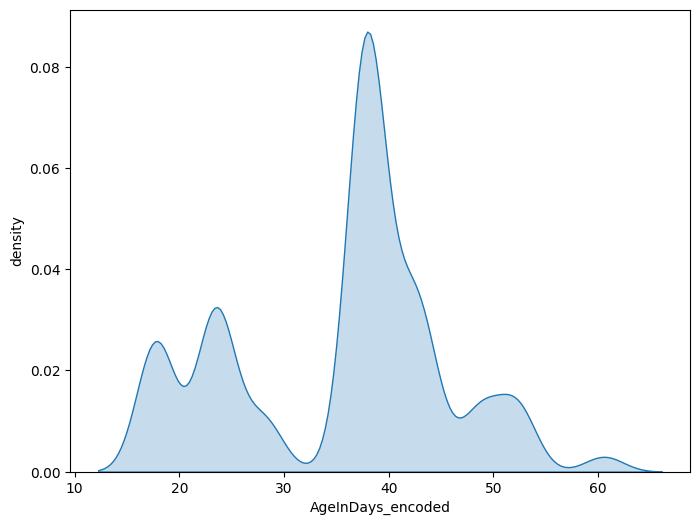

In [33]:
# 밀도 그래프
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_all, x='AgeInDays_encoded', shade=True)  # shade 옵션을 True로 설정하여 그래프 아래 영역을 음영 처리합니다.
# plt.title('AgeInDays_encoded')
plt.xlabel('AgeInDays_encoded')
plt.ylabel('density')
plt.show()

### 2-5) 상관계수 확인

- 상관관계 분석
  - 히트맵, 상관계수 표

In [34]:
candidates_corr_values = train_all[ [
       'CementComponent', 'WaterComponent', 'CoarseAggregateComponent',
       'FineAggregateComponent', 'Strength',
       'EncBlastFurnaceSlag', 'EncFlyAshComponent',
       'EncSuperplasticizerComponent', 'AgeInDays_encoded'
] ].corr()
candidates_corr_values

,CementComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,Strength,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent,AgeInDays_encoded
CementComponent,1.000000,-0.013257,0.051756,-0.342021,0.158000,-0.261083,-0.269000,-0.111233,0.003755
WaterComponent,-0.013257,1.000000,-0.062145,-0.347965,-0.113678,-0.053626,-0.359517,-0.549527,-0.023436
CoarseAggregateComponent,0.051756,-0.062145,1.000000,-0.263621,-0.098410,-0.390135,-0.089462,-0.272328,-0.078158
FineAggregateComponent,-0.342021,-0.347965,-0.263621,1.000000,-0.073900,-0.133867,0.138270,0.123002,-0.032866
Strength,0.158000,-0.113678,-0.098410,-0.073900,1.000000,0.124501,0.040396,0.177844,0.627810
EncBlastFurnaceSlag,-0.261083,-0.053626,-0.390135,-0.133867,0.124501,1.000000,0.032498,0.255426,0.075616
EncFlyAshComponent,-0.269000,-0.359517,-0.089462,0.138270,0.040396,0.032498,1.000000,0.688014,0.048159
EncSuperplasticizerComponent,-0.111233,-0.549527,-0.272328,0.123002,0.177844,0.255426,0.688014,1.000000,0.114444
AgeInDays_encoded,0.003755,-0.023436,-0.078158,-0.032866,0.627810,0.075616,0.048159,0.114444,1.000000


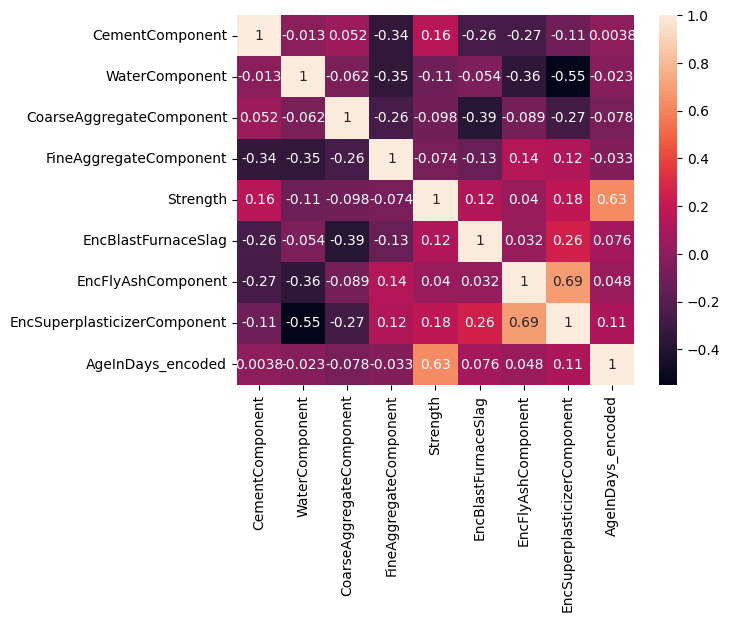

In [35]:
sns.heatmap( candidates_corr_values, annot=True );

#### 2-5-1)WaterComponent 제거

- 전체적으로 모든 피처, 타겟과의 음의 상관계수가 나타남.
- EncSuperplasticizerComponent 피처와 높은 음의 상관계수를 가짐
    - **→ 다중공산성을 해소하기 위해 제거**

In [36]:
train_all = train_all.drop(['WaterComponent'], axis=1)
test_all = test_all.drop(['WaterComponent'], axis=1)

### 2-6) 훈련, 테스트 데이터 통합

In [37]:
train_test_all = pd.concat([train_all, test_all], ignore_index=True)
train_test_all

,CementComponent,CoarseAggregateComponent,FineAggregateComponent,Strength,EncBlastFurnaceSlag,EncFlyAshComponent,EncSuperplasticizerComponent,AgeInDays_encoded
0,525.0,1125.0,613.0,10.38,0,0,0,17.770579
1,143.0,967.0,643.0,23.52,1,1,1,37.887678
2,289.0,1075.0,795.3,36.96,1,0,0,37.887678
3,304.0,932.0,670.0,39.05,1,0,0,44.360781
4,157.0,935.4,781.2,74.19,1,0,0,42.836926
...,...,...,...,...,...,...,...,...
9007,140.0,864.0,753.0,NaN,1,1,1,37.887678
9008,281.0,1104.0,774.0,NaN,0,0,0,37.887678
9009,289.0,924.0,760.0,NaN,1,0,1,37.887678
9010,469.0,852.1,840.5,NaN,1,0,1,17.770579


In [38]:
train_test_all.shape

(9012, 8)

## 3) X, Y, X_subm(제출용) 분할하기

In [39]:
# X, Y, X_subm(제출용) 분할하기

# 제출용
X_subm = train_test_all[ pd.isnull(train_test_all['Strength']) ]

# 훈련용
X = train_test_all[ ~pd.isnull(train_test_all['Strength']) ]

Y = X['Strength']
X = X.drop( ['Strength'], axis=1)
X_subm = X_subm.drop( ['Strength'], axis=1)

In [40]:
# 학습 데이터, 검증 데이터로 분할
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4055, 7), (1352, 7), (4055,), (1352,))

## 4) AutoML -> 최적 모델 찾기

In [41]:
X_auto = pd.concat( [X_train, X_test] )
y_auto = pd.concat( [Y_train, Y_test ] )

X_auto.shape, y_auto.shape

((5407, 7), (5407,))

### 4-1)모듈가져오기 (맨 위로 위치)

In [42]:
!pip install scikit-learn==1.4.1.post1
!pip install -q pycaret
!pip install -q catboost
!pip install --upgrade -q xgboost

In [43]:
from pycaret.regression import *

### 4-2)step

In [44]:
clf = setup(data      = X_auto,        # 훈련데이터 => DataFrame으로 공급->정답 없어야함
            target    = np.log(y_auto),# 정답컬럼명|정답데이터로 대입
            verbose   = False,     # 로그출력
            train_size= 0.9,      # 훈련:검증 비율이 9:1 => cv 수행
            data_split_shuffle=True, # 데이터를 세트로 나눌때 섞을지 여부
            session_id= 100,      # 난수시드
            normalize = False      # 정규화 처리 진행 -> 피처엔지니어링-피처인코딩 처리를 부여
            )
# 훈련용 데이터를 풀로 투입 -> setup에서 0.9를 넣었으므로 -> 절차상 하자는 없음

In [45]:
# 회귀 지원 모델
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 4-3)top6

In [46]:
top_6_model = compare_models(fold=5, round=3, n_select=6, errors='ignore')
# fold = 교차 검증을 수행할 폴드의 수를 결정
# round = 소수점 이하 자리를 반올림할 자릿수를 지정
# n_select = 최고의 성능을 보이는 상위 모델의 개수를 선택
# errors = 오류 처리 방법을 지정 -> 오류 무시: 'ignore'

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.297,0.156,0.395,0.488,0.098,0.097,0.990
lightgbm,Light Gradient Boosting Machine,0.303,0.163,0.403,0.466,0.100,0.099,0.556
catboost,CatBoost Regressor,0.303,0.163,0.404,0.465,0.100,0.098,2.470
br,Bayesian Ridge,0.308,0.165,0.406,0.458,0.100,0.100,0.052
lr,Linear Regression,0.308,0.165,0.406,0.458,0.100,0.100,2.770
ridge,Ridge Regression,0.308,0.165,0.406,0.458,0.100,0.100,0.074
lar,Least Angle Regression,0.308,0.165,0.406,0.458,0.100,0.100,0.088
huber,Huber Regressor,0.314,0.170,0.412,0.441,0.102,0.103,0.154
en,Elastic Net,0.312,0.171,0.413,0.439,0.103,0.103,0.088
ada,AdaBoost Regressor,0.320,0.173,0.416,0.432,0.101,0.101,0.204


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [47]:
top_6_model

[GradientBoostingRegressor(random_state=100),
 LGBMRegressor(n_jobs=-1, random_state=100),
 BayesianRidge(),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=100)]

## 5)optuna

- 최종 훈련에 사용한 데이터의 shape

In [54]:
train_all.shape, test_all.shape, train_test_all.shape

((5407, 8), (3605, 7), (9012, 8))

In [48]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00


### 5-1) GradientBoostingRegressor

In [49]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from math import sqrt

def objective(trial):
    # 하이퍼파라미터 탐색 범위 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.5)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    # GradientBoostingRegressor 회귀 모델 생성
    model = GradientBoostingRegressor(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       learning_rate=learning_rate,
                                       subsample=subsample,
                                       random_state=42)

    # 교차 검증을 통한 평가
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    rmse = sqrt(-scores.mean())  # 음수 MSE를 RMSE로 변환

    return rmse

# 훈련 데이터 전체를 사용하여 훈련
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Optuna 최적화 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", study.best_params)

# 최적 하이퍼파라미터로 모델 훈련
best_model = GradientBoostingRegressor(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# 모델 평가
y_pred = best_model.predict(X_test)
best_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("최적 모델 RMSE:", best_rmse) # 11.803871328209828


[I 2024-04-26 01:29:13,121] A new study created in memory with name: no-name-14065a97-0321-48f5-9ea8-07a943f113c8
[I 2024-04-26 01:29:27,168] Trial 0 finished with value: 14.537674036366587 and parameters: {'n_estimators': 303, 'max_depth': 5, 'learning_rate': 0.3589896004660865, 'subsample': 0.5195918939612048}. Best is trial 0 with value: 14.537674036366587.
[I 2024-04-26 01:29:45,951] Trial 1 finished with value: 16.03201154346559 and parameters: {'n_estimators': 262, 'max_depth': 9, 'learning_rate': 0.3876507220077082, 'subsample': 0.6497162386821882}. Best is trial 0 with value: 14.537674036366587.
[I 2024-04-26 01:30:01,650] Trial 2 finished with value: 13.472482454911567 and parameters: {'n_estimators': 342, 'max_depth': 4, 'learning_rate': 0.28590944212958125, 'subsample': 0.9594517237085848}. Best is trial 2 with value: 13.472482454911567.
[I 2024-04-26 01:30:04,814] Trial 3 finished with value: 14.295581176236563 and parameters: {'n_estimators': 89, 'max_depth': 9, 'learning_

최적 하이퍼파라미터: {'n_estimators': 87, 'max_depth': 3, 'learning_rate': 0.10027703523617114, 'subsample': 0.9438724086356071}
최적 모델 RMSE: 11.817537676112739


In [50]:
# 제출

sub_y_pred = best_model.predict( X_subm )
submission['Strength'] = sub_y_pred
submission
submission.to_csv('submission_0424(38)_최종.csv', index=False)

# [4] 결과

- 최종 EDA, 모델
  - 결측치 -> 0/1 encoding
  - agelndays -> target encoding
  - watercomponent -> 삭제
  - gradientboost
  - 12.27435 -> **55등 / Bronze 상위 7%**
  - 최적 하이퍼파라미터: {'n_estimators': 87, 'max_depth': 3, 'learning_rate': 0.10027703523617114, 'subsample': 0.9438724086356071}
  - 최적 모델 RMSE: 11.817537676112739

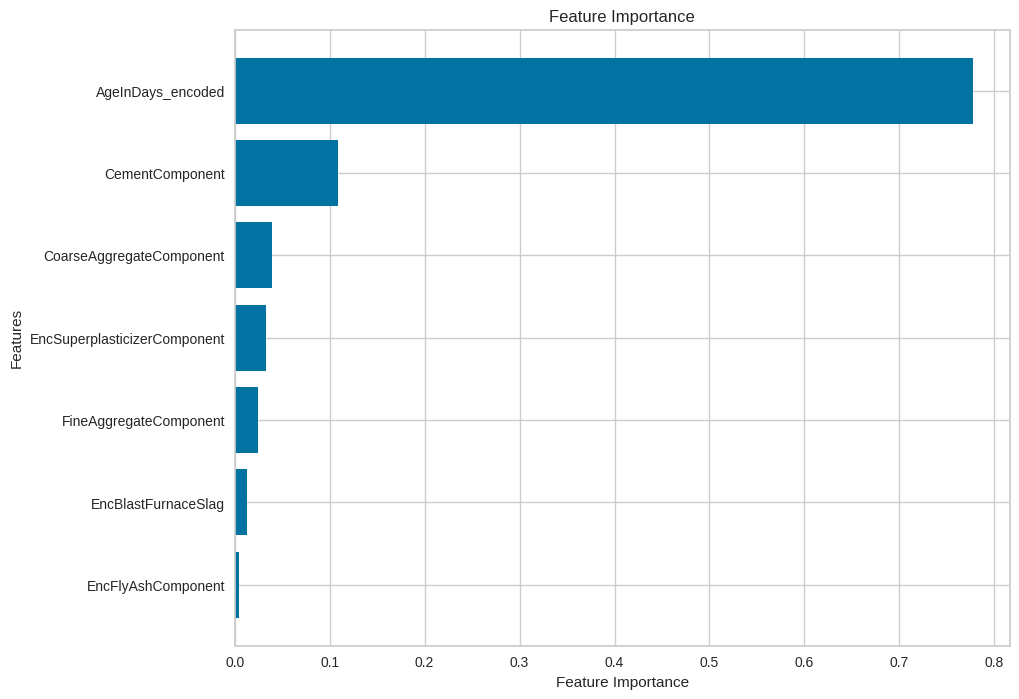

In [51]:
# 특징들의 중요도를 그래프로 나타내기
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

- 사전적 정보에 의하면, CementComponent, WaterComponent 요소가 콘크리트 강도와 밀접한 관련이 있음. 그러나 EDA 결과, WaterComponent 요소를 제거하였을 때, 모델 성능이 더욱 향상됨.
    - CementComponent, WaterComponent는 개별적인 피처로 파악하는 것이 아닌, **CementComponent와 WaterComponent의 구성 비율 정도로 강도를 예측하는 것이 필요**함.
- 콘크리트를 구성하는 요소들 역시 중요하나, **콘크리트를 건조시키는 ‘일수’가 강도를 높이는데 중요한 요소**임을 파악할 수 있음.